* If Feature Selection techniques (Filter, Wrapper, Embedded) don't improve model performance, try Feature Extraction techniques (PCA, LDA).
* PCA is used only for Dimensionality Reduction (Unsupervised Learning)
* LDA is used for both Dimensionality Reduction and Classification (Supervised Learning)

# Import Libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# Load the Dataset

In [66]:
data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome',axis=1)
y = data[:]['Outcome']

colnames = list(data)

# Summary Statistics

In [67]:
np.round(data.describe().transpose(),decimals=2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


# Frequency Distributions

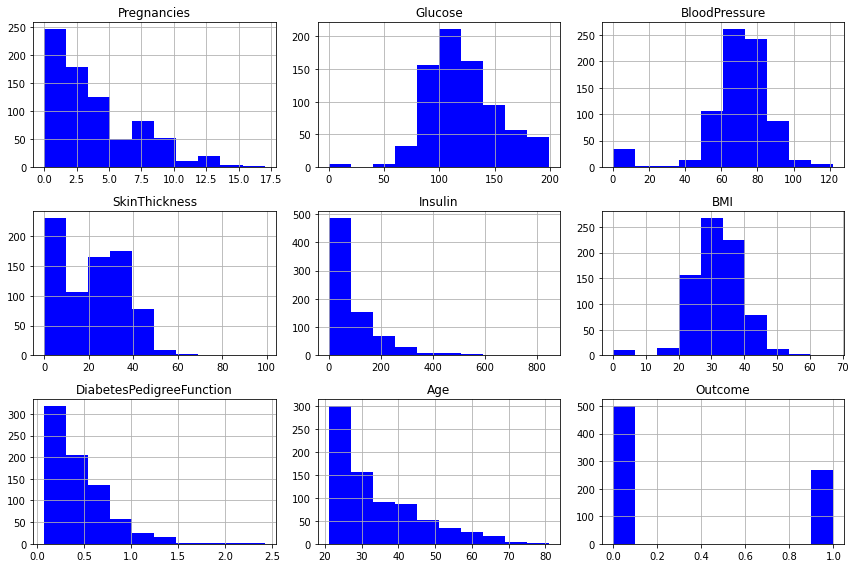

In [68]:
# Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

# Correlation Matrix

In [69]:
# correlation matrix
corm = data.corr().values
print(pd.DataFrame(np.round(corm,decimals=2),index=colnames,columns=colnames),'\n')

                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   
Outcome                          0.22     0.47           0.07           0.07   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07  0.02                     -0.03  0.54   
Glucose                      0.33  0.22          

# Split Train and Test

In [70]:
# Split Training & Testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=123)

# Apply the LDA

In [71]:
lda = LDA()
X_train = lda.fit(X_train, y_train)

# Percentage of class labels (0 or 1)
print("Model Priors:\n",lda.priors_)

Model Priors:
 [0.66480447 0.33519553]


# Loadings, Means and Coefficients

In [77]:
# Binary classification will result in 1 Component only
lda_coef = pd.DataFrame(np.transpose(lda.coef_), index=list(X))
print("\nLDA Coefficients:",lda_coef)


LDA Coefficients:                                  0
Pregnancies               0.124243
Glucose                   0.035324
BloodPressure            -0.012932
SkinThickness             0.003118
Insulin                  -0.001491
BMI                       0.084659
DiabetesPedigreeFunction  0.846990
Age                       0.011822


# Apply LDA on the Test set

In [78]:
pred=lda.predict(X_test)
print(np.unique(pred, return_counts=True))
confmatrix = pd.DataFrame(confusion_matrix(pred, y_test, labels=[0,1]), index=[0,1])
print("\nConfusion Matrix:\n", confmatrix)
print('\n')
print(classification_report(y_test, pred, digits=3))

(array([0, 1], dtype=int64), array([158,  73], dtype=int64))

Confusion Matrix:
      0   1
0  129  29
1   14  59


              precision    recall  f1-score   support

           0      0.816     0.902     0.857       143
           1      0.808     0.670     0.733        88

    accuracy                          0.814       231
   macro avg      0.812     0.786     0.795       231
weighted avg      0.813     0.814     0.810       231



# Using LDA to predict new data

In [74]:
# say we have a new case and we want to predict churn
newpatient = [6,148,72,35,0,33.6,0.627,50]
diagnosis = lda.predict([newpatient])
print('Predicted Class: %d' % diagnosis)

Predicted Class: 1
